In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the data and clean it up
df = pd.DataFrame()
dfs = []
sample_types = ['plant', 'rock', 'water']

for sample_type in sample_types:
    sample_df = pd.read_csv(f'{sample_type}.csv').set_index('Sample').transpose()
    sample_df['Sample type'] = sample_type
    dfs.append(sample_df)

for i in range(1, len(dfs)):
    dfs[i].columns = dfs[0].columns
df_groupie = pd.concat(dfs, keys=sample_types, names=['Sample type', 'Sample name'])
df = pd.concat(dfs)
grouped_by_location = df_groupie.groupby(by=lambda name: name[:2], level='Sample name')
df_reset = df.reset_index()
df_reset['Location'] = df_reset['index'].str[:2]

In [3]:
df

Sample,ppb Pb,206Pb/204Pb,± (2s),206Pb/207Pb,± (2s),206Pb/208Pb,± (2s),87Sr/86Sr,± (2s),ppb Sr,Sample type
ML 24-01,5.060,18.69,0.03,1.194,0.001,0.4858,0.0009,0.708889,0.00002,748.9,plant
ML 24-02,1.830,18.58,0.03,1.187,0.001,0.4845,0.0009,0.708955,0.00002,665.7,plant
ML 24-03,0.190,18.44,0.03,1.180,0.001,0.4833,0.0009,0.716575,0.00002,14.5,plant
WT 24-04,4.700,19.11,0.03,1.219,0.001,0.4893,0.0009,0.708392,0.00002,753.0,plant
WT 24-05,0.940,18.47,0.03,1.177,0.001,0.4821,0.0009,0.709862,0.00002,33.7,plant
LL 24-08,1.330,19.00,0.06,1.206,0.001,0.4890,0.0009,0.708571,0.00002,228.1,plant
LL 24-10,37.000,18.79,0.03,1.199,0.001,0.4844,0.0009,0.706651,0.00002,1641.7,plant
HL 24-11,1.240,18.49,0.04,1.183,0.001,0.4835,0.0009,0.707853,0.00002,495.2,plant
HL 24-12,2.030,18.71,0.03,1.195,0.001,0.4863,0.0009,0.707936,0.00002,7.0,plant
RS 24-13,1.010,18.65,0.04,1.190,0.001,0.4864,0.0009,0.718928,0.00002,5292.6,plant


In [4]:
import seaborn as sns

Text(0.5, 0, '')

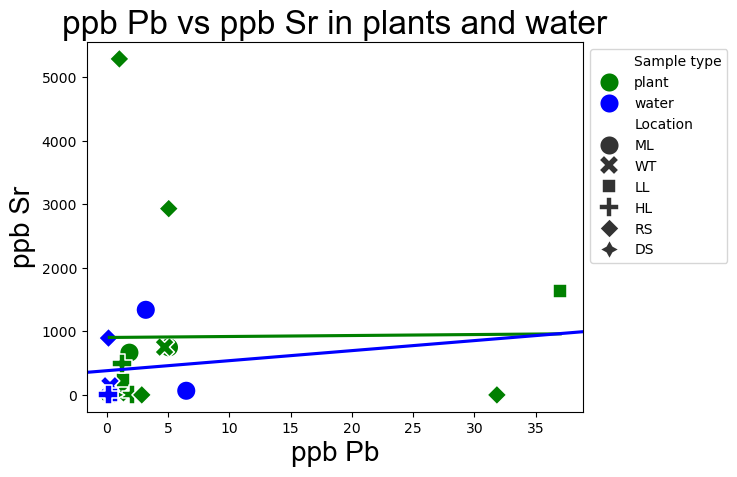

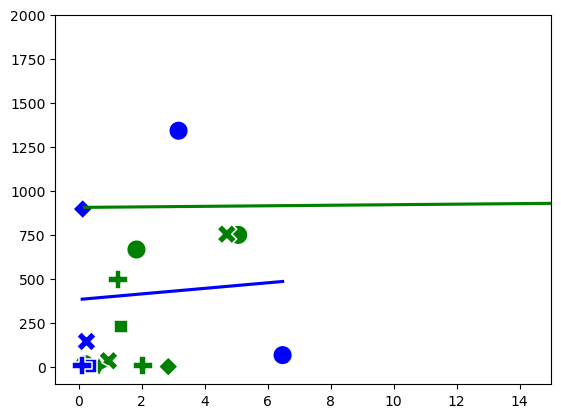

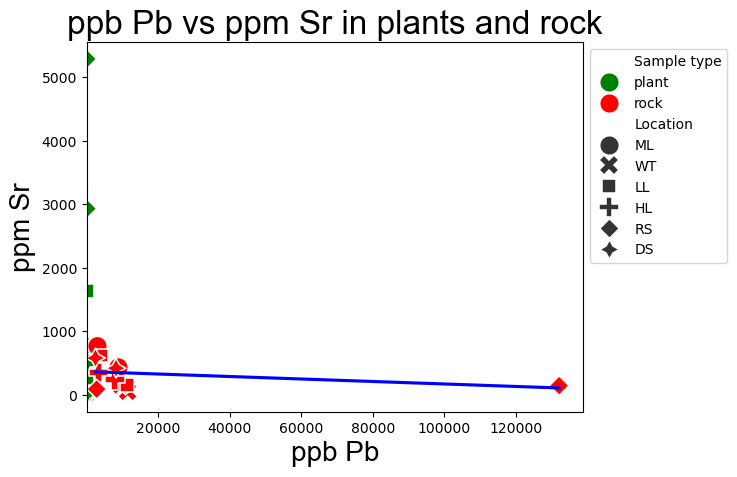

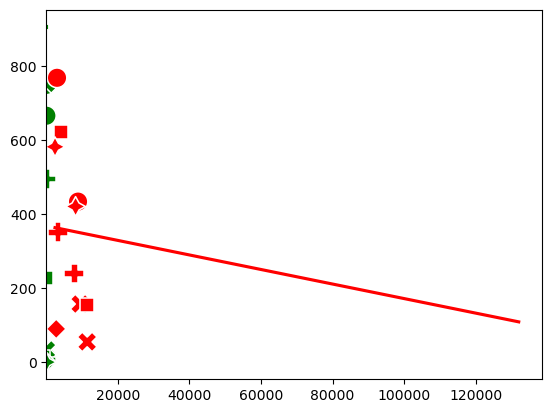

In [5]:
from matplotlib import pyplot
secondary = 'water'

metals = ['Pb', 'Sr']
palette = {"plant": "green", "water": "blue", "rock": "red"}

    
secondary = 'water'
fig, ax = plt.subplots()
sns.regplot(data=df_reset[(df_reset['Sample type'] == 'plant')], color='green', x=f'ppb Pb', y=f'ppb Sr', ax=ax, ci=None, scatter=False)
sns.regplot(data=df_reset[(df_reset['Sample type'] == secondary)], color='blue', x=f'ppb Pb', y=f'ppb Sr', ax=ax, ci=None, scatter=False, truncate=False)
sns.scatterplot(x=f'ppb Pb', y=f'ppb Sr', data=df_reset[(df_reset['Sample type'] == 'plant') | (df_reset['Sample type'] == secondary)], hue='Sample type', palette=palette, style="Location", s=200)
ax.set_title(f'ppb Pb vs ppb Sr in plants and {secondary}', font='Arial', fontsize=24)
ax.set_ylabel('ppb Sr', font='Arial', fontsize=20)
ax.set_xlabel('ppb Pb', font='Arial', fontsize=20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
fig, ax = plt.subplots()
sr_limit = 2000
pb_limit = 15
ax.set_xlim(-pb_limit/20, pb_limit)  
ax.set_ylim(-sr_limit/20, sr_limit) 
sns.regplot(data=df_reset[(df_reset['Sample type'] == 'plant')], color='green', x=f'ppb Pb', y=f'ppb Sr', ax=ax, ci=None, scatter=False)
sns.regplot(data=df_reset[(df_reset['Sample type'] == secondary)], color='blue', x=f'ppb Pb', y=f'ppb Sr', ax=ax, ci=None, scatter=False)
sns.scatterplot(x=f'ppb Pb', y=f'ppb Sr', data=df_reset[((df_reset['Sample type'] == 'plant') | (df_reset['Sample type'] == secondary)) & ((df_reset['ppb Sr'] < sr_limit) & (df_reset['ppb Pb'] < pb_limit))], hue='Sample type', palette=palette, style="Location", s=200, legend=False)
ax.set_title(f'', font='Arial', fontsize=24)
ax.set_ylabel('', font='Arial', fontsize=20)
ax.set_xlabel('', font='Arial', fontsize=20)

secondary = 'rock'
fig, ax = plt.subplots()
sns.regplot(data=df_reset[(df_reset['Sample type'] == 'plant')], color='green', x=f'ppb Pb', y=f'ppb Sr', ax=ax, ci=None, scatter=False, truncate=False)
sns.regplot(data=df_reset[(df_reset['Sample type'] == secondary)], color='blue', x=f'ppb Pb', y=f'ppb Sr', ax=ax, ci=None, scatter=False)
sns.scatterplot(x=f'ppb Pb', y=f'ppb Sr', data=df_reset[(df_reset['Sample type'] == 'plant') | (df_reset['Sample type'] == secondary)], hue='Sample type', palette=palette, style="Location", s=200)
ax.set_title(f'ppb Pb vs ppm Sr in plants and {secondary}', font='Arial', fontsize=24)
ax.set_ylabel('ppm Sr', font='Arial', fontsize=20)
ax.set_xlabel('ppb Pb', font='Arial', fontsize=20)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sr_limit = 1400
pb_limit = 20000
fig, ax = plt.subplots()
# ax.set_xlim(-pb_limit/20, pb_limit)  
# ax.set_ylim(-sr_limit/20, sr_limit) 
sns.regplot(data=df_reset[(df_reset['Sample type'] == 'plant')], color='green', x=f'ppb Pb', y=f'ppb Sr', ax=ax, ci=None, scatter=False, truncate=False)
sns.regplot(data=df_reset[(df_reset['Sample type'] == secondary)], color='red', x=f'ppb Pb', y=f'ppb Sr', ax=ax, ci=None, scatter=False)
sns.scatterplot(x=f'ppb Pb', y=f'ppb Sr', data=df_reset[((df_reset['Sample type'] == 'plant') | (df_reset['Sample type'] == secondary)) & ((df_reset['ppb Sr'] < sr_limit) & (df_reset['ppb Pb'] < pb_limit))], hue='Sample type', palette=palette, style="Location", s=200, legend=False)
ax.set_title(f'', font='Arial', fontsize=24)
ax.set_ylabel('', font='Arial', fontsize=16)
ax.set_xlabel('', font='Arial', fontsize=16)

KeyError: '87Sr/166Sr'

<Figure size 10000x10000 with 0 Axes>

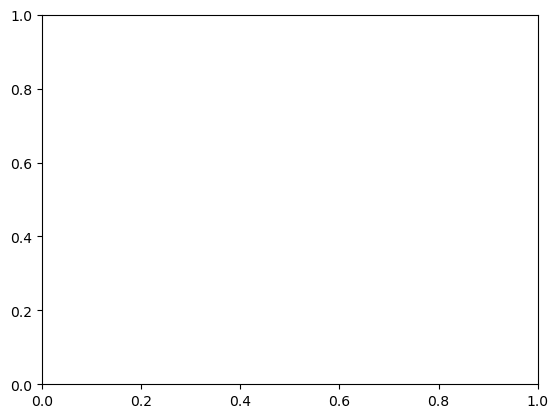

In [6]:
metals = ['Pb', 'Sr']
palette = {"plant": "green", "water": "blue", "rock": "red"}
pyplot.figure(figsize=(100, 100))
for secondary in ['water', 'rock']:
    fig, ax = plt.subplots()
    sns.regplot(data=df_reset[(df_reset['Sample type'] == 'plant')], color='green', x=f'206Pb/204Pb', y=f'87Sr/166Sr', ax=ax, ci=None, scatter=False)
    sns.regplot(data=df_reset[(df_reset['Sample type'] == secondary)], color=palette[secondary], x=f'206Pb/204Pb', y=f'87Sr/86Sr', ax=ax, ci=None, scatter=False)
    sns.scatterplot(x=f'206Pb/204Pb', y=f'87Sr/86Sr', data=df_reset[(df_reset['Sample type'] == 'plant') | (df_reset['Sample type'] == secondary)], hue='Sample type', palette=palette, style="Location", s=200)
    ax.set_title(f'206Pb/204Pb vs 87Sr/86Sr in plants and {secondary}', font='Arial', fontsize=24)
    ax.set_ylabel('87Sr/86Sr', font='Arial', fontsize=20)
    ax.set_xlabel('206Pb/204Pb', font='Arial', fontsize=20)


Sample type,plant,rock,water
Location,,,
HL,1.635,5523.70,0.107
LL,19.165,7690.05,0.348
ML,2.360,5918.70,4.818
RS,10.180,67405.80,0.122
WT,2.820,10435.15,0.242


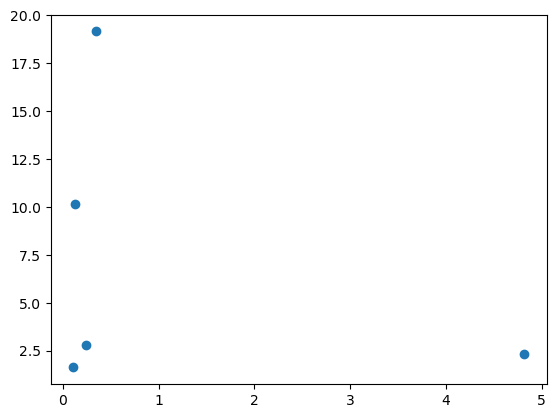

0.3


Sample type,plant,rock,water
Location,,,
HL,251.100000,295.6,6.10
LL,934.900000,387.4,5.00
ML,476.366667,601.0,703.15
RS,2056.825000,118.5,895.70
WT,393.350000,106.6,143.30


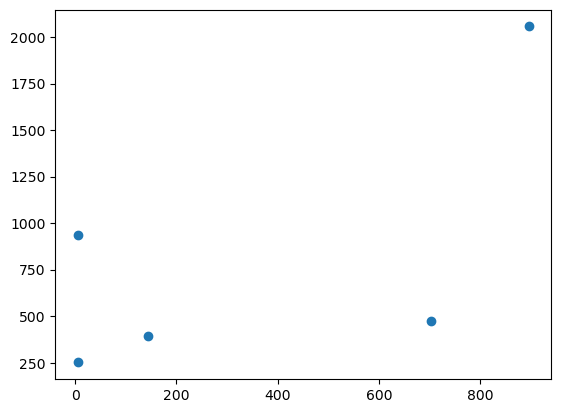

0.39999999999999997


Sample type,plant,rock,water
Location,,,
DS,0.640,5300.45,NaN
HL,1.635,5523.70,0.107
LL,19.165,7690.05,0.348
ML,2.360,5918.70,4.818
RS,10.180,67405.80,0.122
WT,2.820,10435.15,0.242


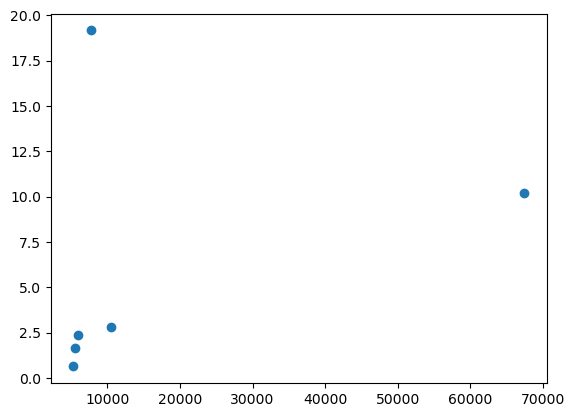

0.8285714285714287


Sample type,plant,rock,water
Location,,,
DS,0.900000,501.4,NaN
HL,251.100000,295.6,6.10
LL,934.900000,387.4,5.00
ML,476.366667,601.0,703.15
RS,2056.825000,118.5,895.70
WT,393.350000,106.6,143.30


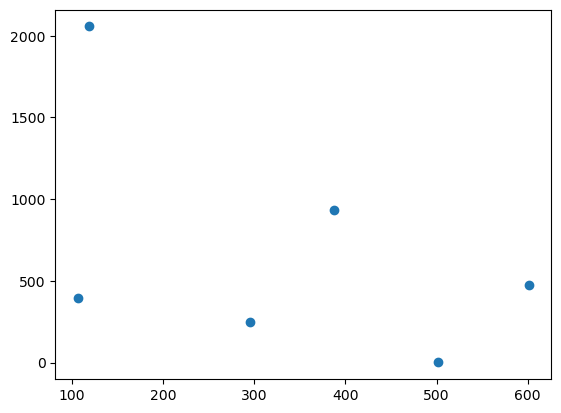

-0.2


In [ ]:
from scipy.stats import spearmanr
stats = pd.DataFrame()
for secondary in ['water', 'rock']:
    for metal in ['Pb', 'Sr']:
        avg_levels = df_reset.groupby(['Location', 'Sample type'])[f'ppb {metal}'].mean().unstack()
        if secondary == 'water':
            avg_levels = avg_levels.dropna()
        display(avg_levels)
        correlation, p_value = spearmanr(avg_levels[f'{secondary}'], avg_levels['plant'])
        plt.scatter(avg_levels[f'{secondary}'], avg_levels['plant'])
        plt.show()
        print(correlation)
        stats = pd.concat([stats, pd.DataFrame([{'metal': metal, 'secondary': secondary, 'correlation': correlation, 'p_value': p_value}])])

In [ ]:
stats

,metal,secondary,correlation,p_value
0,Pb,water,0.300000,0.623838
0,Sr,water,0.400000,0.504632
0,Pb,rock,0.828571,0.041563
0,Sr,rock,-0.200000,0.704000


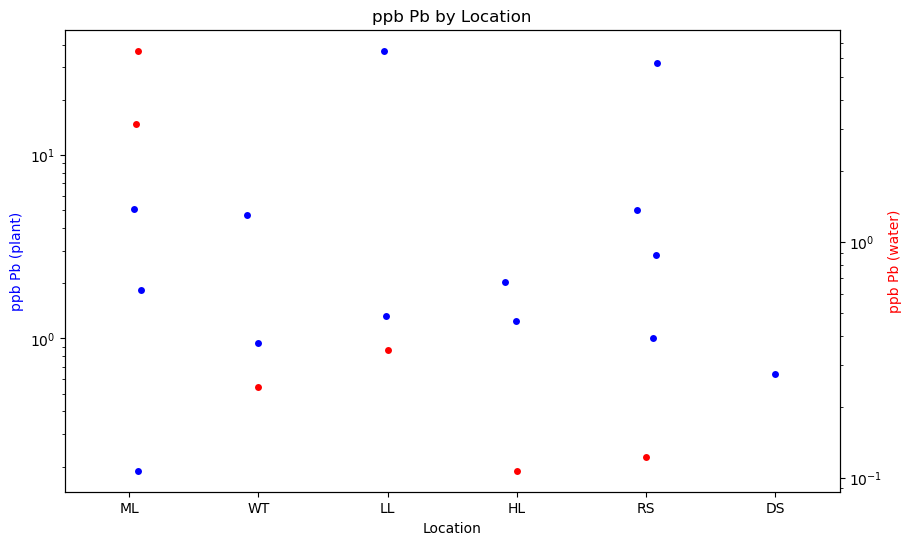

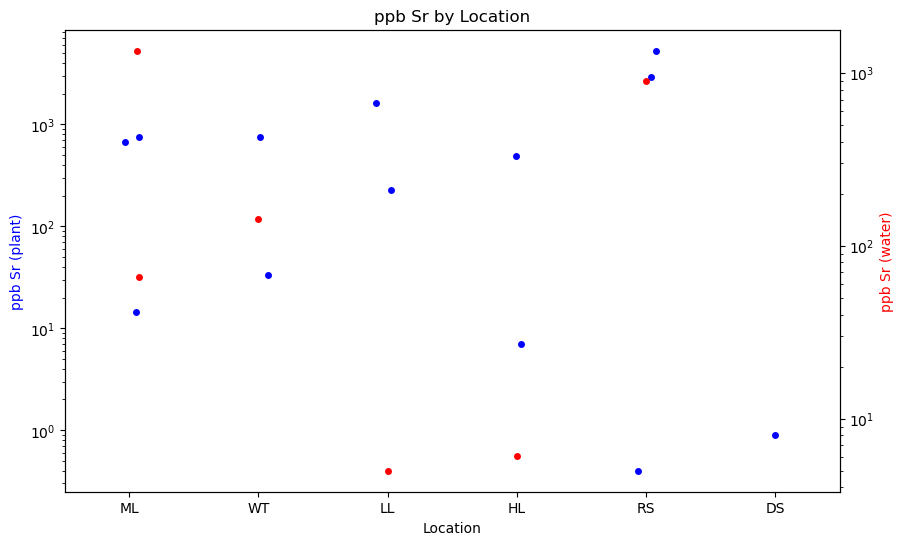

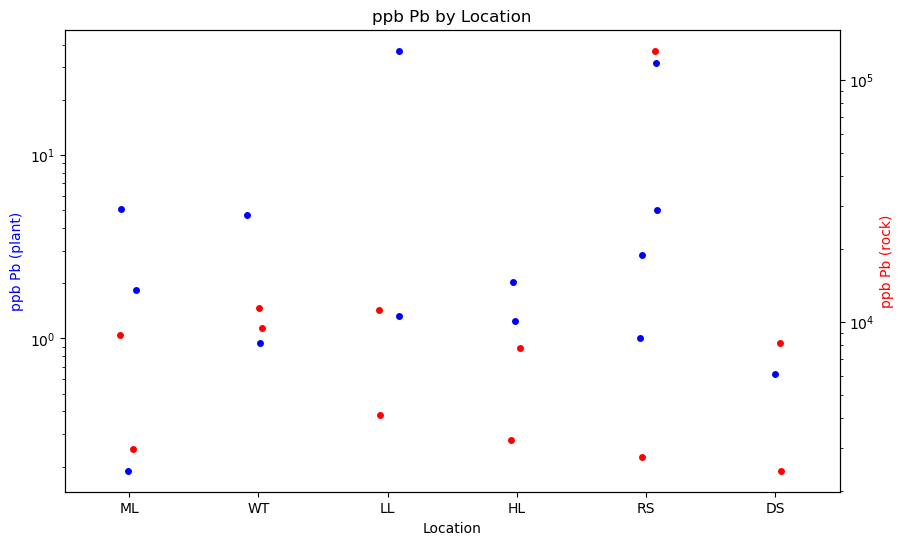

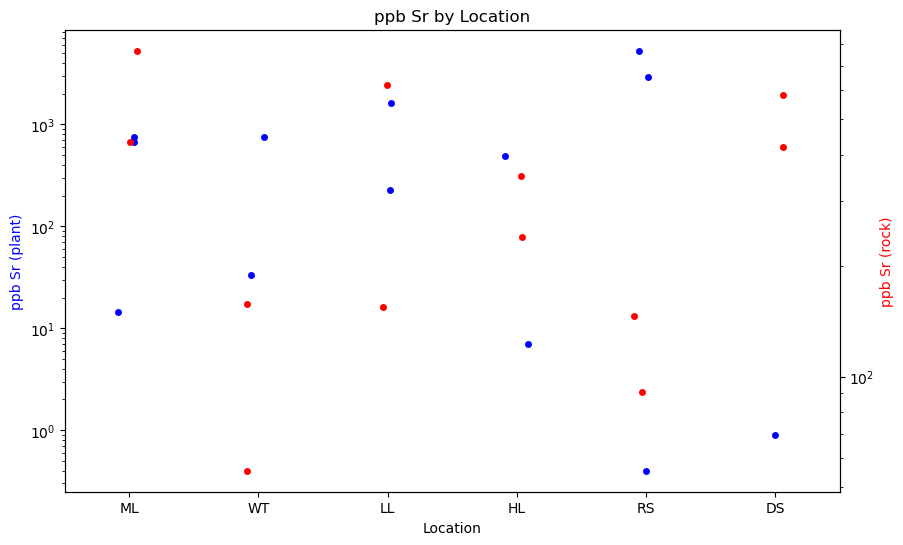

In [ ]:
# Extract the location from the 'Sample name' for the x-axis

# Create the strip plots
for secondary in ['water', 'rock']:
    for metal in ['Pb', 'Sr']:
        fig = plt.figure(figsize=(10, 6))
        ax1 = sns.stripplot(x='Location', y=f'ppb {metal}', data=df_reset[df_reset['Sample type'] == 'plant'], jitter=True, color='blue', log_scale=True,)
        # sns.boxplot(x='Location', y=f'ppb {metal}', data=df_reset[df_reset['Sample type'] == 'plant'], color='blue', ax=ax1, fill=False, showmeans=True)
        ax2 = ax1.twinx()
        sns.stripplot(x='Location', y=f'ppb {metal}', data=df_reset[df_reset['Sample type'] == f'{secondary}'], jitter=True, color='red', ax=ax2, log_scale=True)
        # sns.boxplot(x='Location', y=f'ppb {metal}', data=df_reset[df_reset['Sample type'] == f'{secondary}'], color='red', ax=ax2, fill=False,  showmeans=True)
        ax1.set_ylabel(f'ppb {metal} (plant)', color='blue')
        ax2.set_ylabel(f'ppb {metal} ({secondary})', color='red')
        plt.title(f'ppb {metal} by Location')
        plt.xlabel('Location')
        plt.show()